# Employee Attrition Prediction Using Machine Learning

#### Import neccessary libraries

In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np
import imblearn
import os

# Libraries for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to perform statistical analysis
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for hypertuning
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.base import ClassifierMixin

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

# Library to display whole dataset
pd.set_option("display.max.columns",None)

#### Load dataset

In [2]:
df = pd.read_csv('IBM HR Analytics Dataset.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Analyse dataset

In [4]:
print("dataset shape: ",df.shape)

dataset shape:  (1470, 35)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} numerical columns in the dataset")
print(f"There are {categorical_count} categorical columns in the dataset")

There are 26 numerical columns in the dataset
There are 9 categorical columns in the dataset


In [7]:
# Check for duplicate records
print("Duplicates in dataset: ",df.duplicated().sum())

Duplicates in dataset:  0


In [8]:
# Compute total number of missing values and the percentage of missing values
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total no. of missing values"})
missing_data["% of missing values"] = round((missing_data["Total no. of missing values"]/len(df))*100,2)
missing_data

,Total no. of missing values,% of missing values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [9]:
# Perform descriptive analysis on numeric attributes
numeric_summary = df.describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
# Perform descriptive analysis on categorical attributes
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [11]:
# List of categorical variables
categorical_vars = [
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'Over18',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

# Create dictionaries to store results
results = {
    'Variable': [],
    'Unique Values': [],
    'Mode': [],
    'Mode Frequency': []
}

# Calculate unique values, mode, and frequency of the mode for each categorical variable
for var in categorical_vars:
    unique_vals = df[var].unique()
    mode_val = df[var].mode()[0]
    mode_freq = df[var].value_counts().get(mode_val, 0)
    
    results['Variable'].append(var)
    results['Unique Values'].append(', '.join(map(str, unique_vals)))
    results['Mode'].append(mode_val)
    results['Mode Frequency'].append(mode_freq)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)

                    Variable  \
0             BusinessTravel   
1                 Department   
2                  Education   
3             EducationField   
4    EnvironmentSatisfaction   
5                     Gender   
6             JobInvolvement   
7                   JobLevel   
8                    JobRole   
9            JobSatisfaction   
10             MaritalStatus   
11                    Over18   
12                  OverTime   
13         PerformanceRating   
14  RelationshipSatisfaction   
15          StockOptionLevel   
16           WorkLifeBalance   

                                        Unique Values                    Mode  \
0        Travel_Rarely, Travel_Frequently, Non-Travel           Travel_Rarely   
1      Sales, Research & Development, Human Resources  Research & Development   
2                                       2, 1, 4, 3, 5                       3   
3   Life Sciences, Other, Medical, Marketing, Tech...           Life Sciences   
4                 

In [12]:
# Drop insignificant features
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

#### Exploratory data analysis

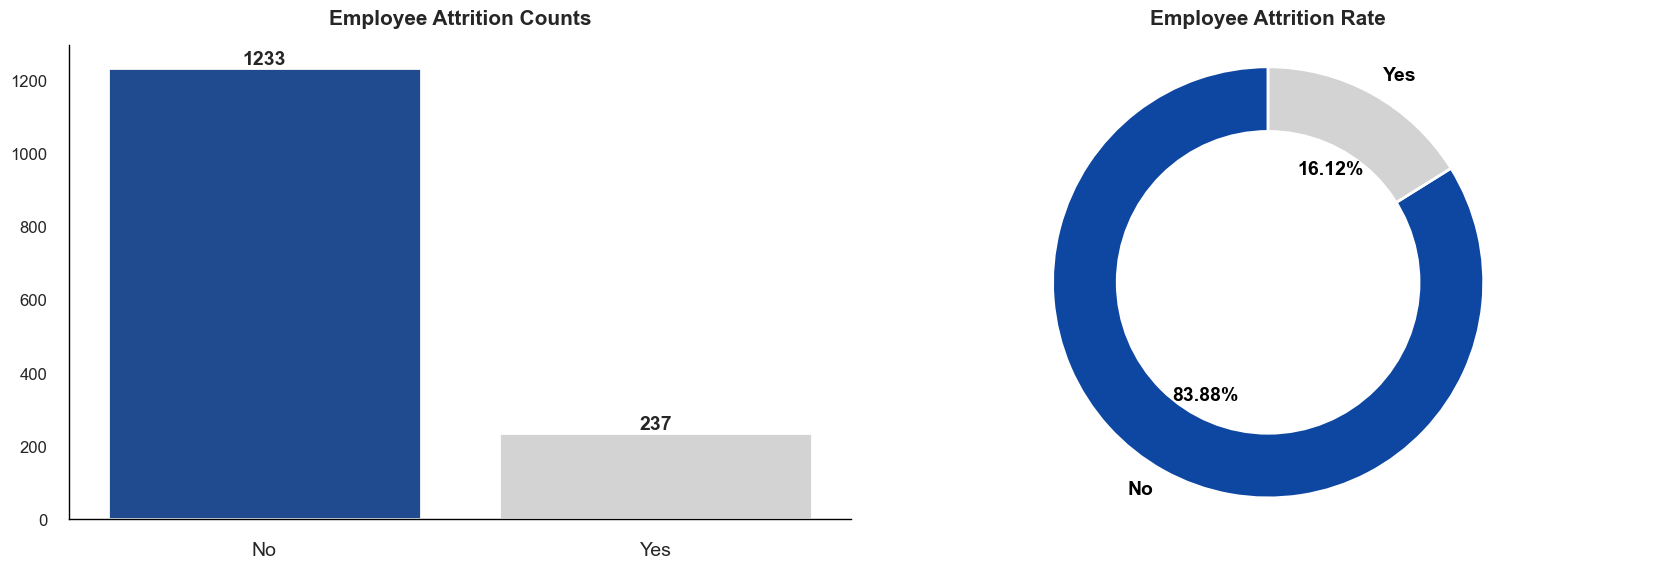

In [13]:
# Set the color palette
colors = ["#0d47a1", "#D3D3D3"]  # Darker blue and light grey

# Visualization to show employee attrition in counts
plt.figure(figsize=(17, 6))

# Bar plot for attrition counts
plt.subplot(1, 2, 1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=colors)

# Refine the plot
plt.title("Employee Attrition Counts", fontweight="bold", size=15, pad=15)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], fontsize=14)
plt.yticks(fontsize=12)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v + 10, v, ha="center", fontsize=14, fontweight="bold")

# Add x and y axis lines
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color("black")
plt.gca().spines['bottom'].set_color("black")
plt.gca().spines['left'].set_linewidth(1)  # Set line width to 1
plt.gca().spines['bottom'].set_linewidth(1)  # Set line width to 1

# Remove the grid and top/right background
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().patch.set_alpha(0)

# Visualization to show employee attrition in percentage (donut chart)
plt.subplot(1, 2, 2)
plt.pie(attrition_rate, labels=["No", "Yes"], autopct="%.2f%%", textprops={"size":14, "fontweight": "bold", "color": "black"},
        colors=colors, explode=[0, 0], startangle=90)

# Add a center circle for a donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Refine the pie chart
plt.title("Employee Attrition Rate", fontweight="bold", size=15, pad=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Remove background
plt.gcf().set_facecolor('white')

# Display the plots
plt.tight_layout()
plt.show()

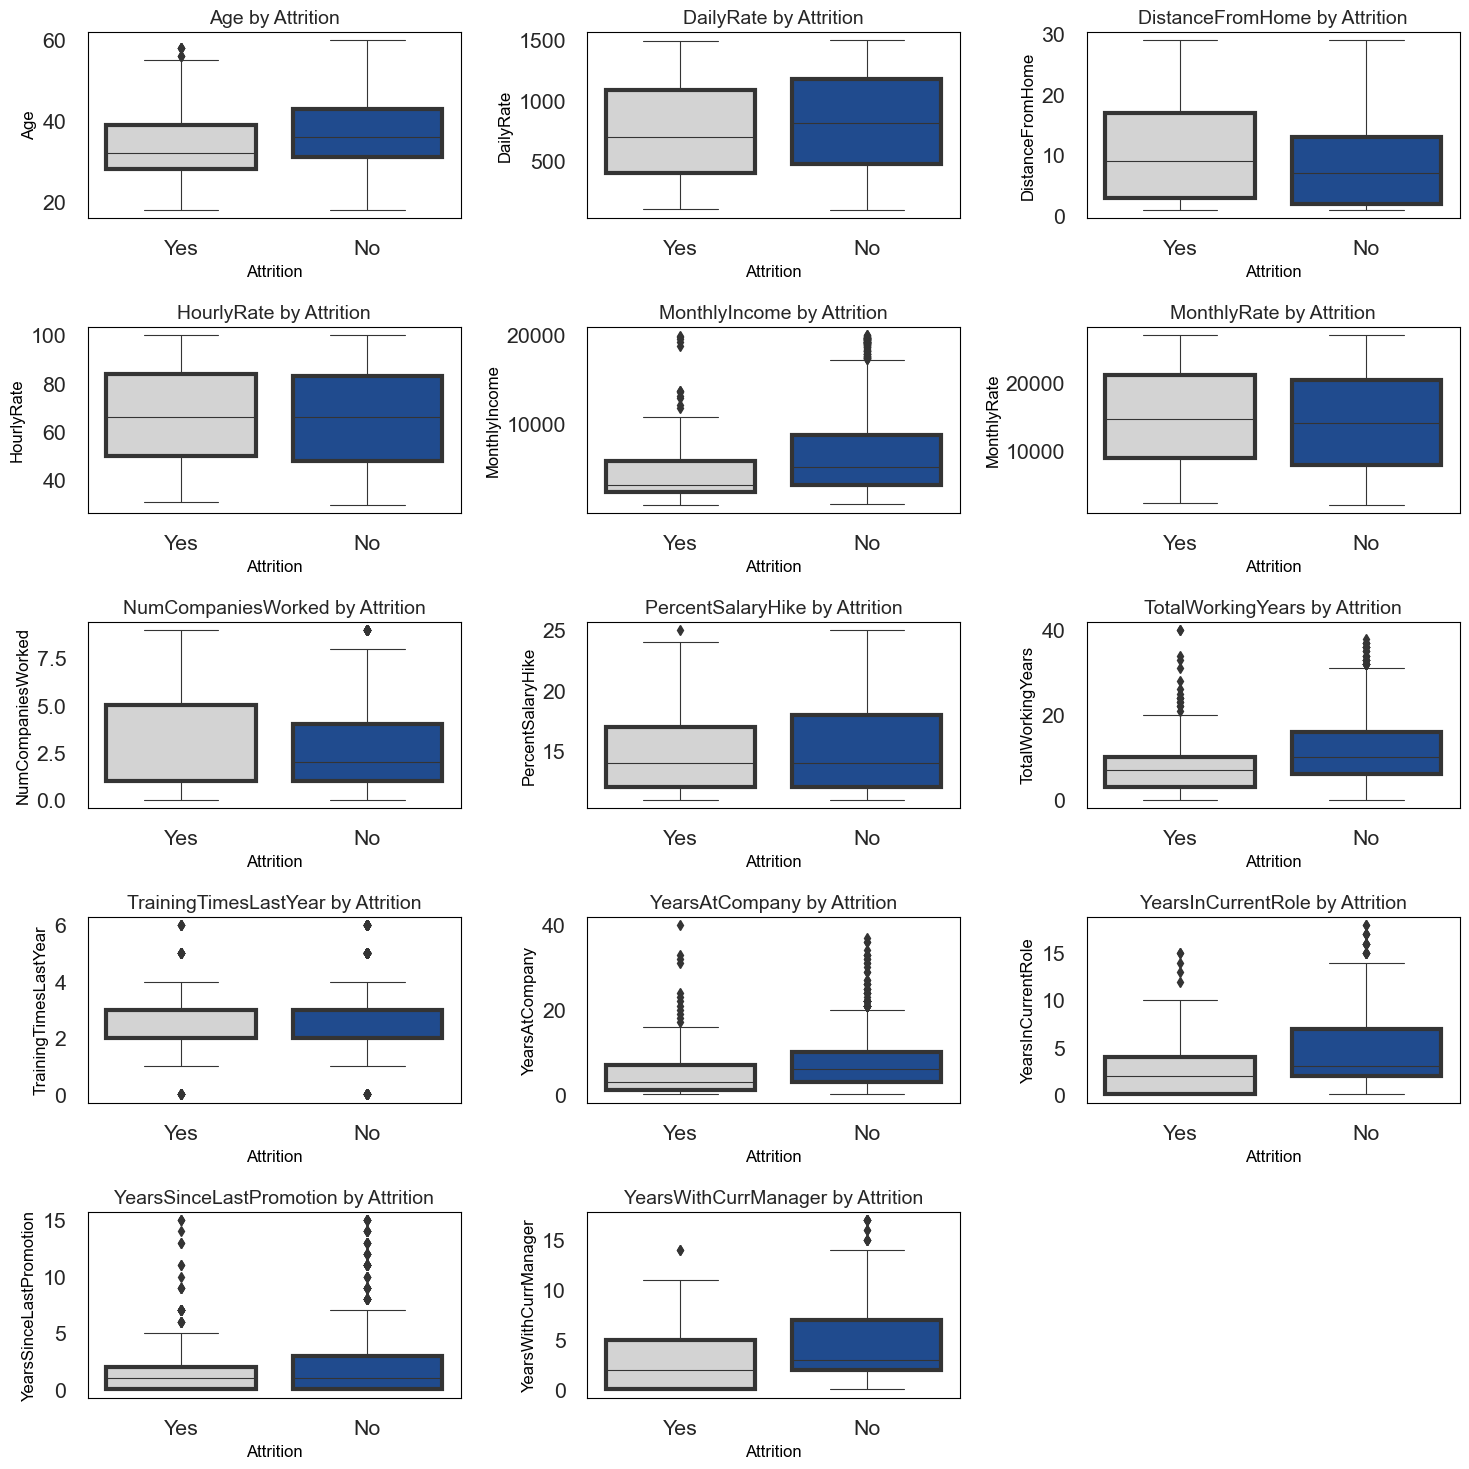

In [14]:
# Attrition vs numeric variables

# Colors for Attrition ('No' -> blue, 'Yes' -> grey)
palette = {"No": "#0d47a1", "Yes": "#D3D3D3"}

# Specify the numeric columns to include
numeric_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))  # Adjust the grid size (5 rows, 3 columns)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Set the entire background color of the figure to white
fig.patch.set_facecolor('white')

# Loop through each numeric column and plot side-by-side box plots
for i, col in enumerate(numeric_columns):
    if col in df.columns:  
        boxplot = sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i], palette=palette)

        # Set the background of each subplot to white
        axes[i].set_facecolor('white')

        # Set titles and labels
        axes[i].set_title(f'{col} by Attrition', fontsize=14)  
        axes[i].set_xlabel('Attrition', fontsize=12, color="black")
        axes[i].set_ylabel(col, fontsize=12, color="black")

        # Remove gridlines
        axes[i].grid(False)

        # Set axis line colors 
        for spine in ['top', 'right', 'left', 'bottom']:
            axes[i].spines[spine].set_color('black')
            axes[i].spines[spine].set_linewidth(0.8) 

        # Set boxplot lines 
        for line in boxplot.artists:
            line.set_edgecolor('black')  
            line.set_linewidth(0.8)  

        # Customize lines inside the boxplot (median, whiskers, caps)
        for line in boxplot.lines:
            line.set_linewidth(0.8)  

# Remove any empty plots if there are fewer plots than grid spaces
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

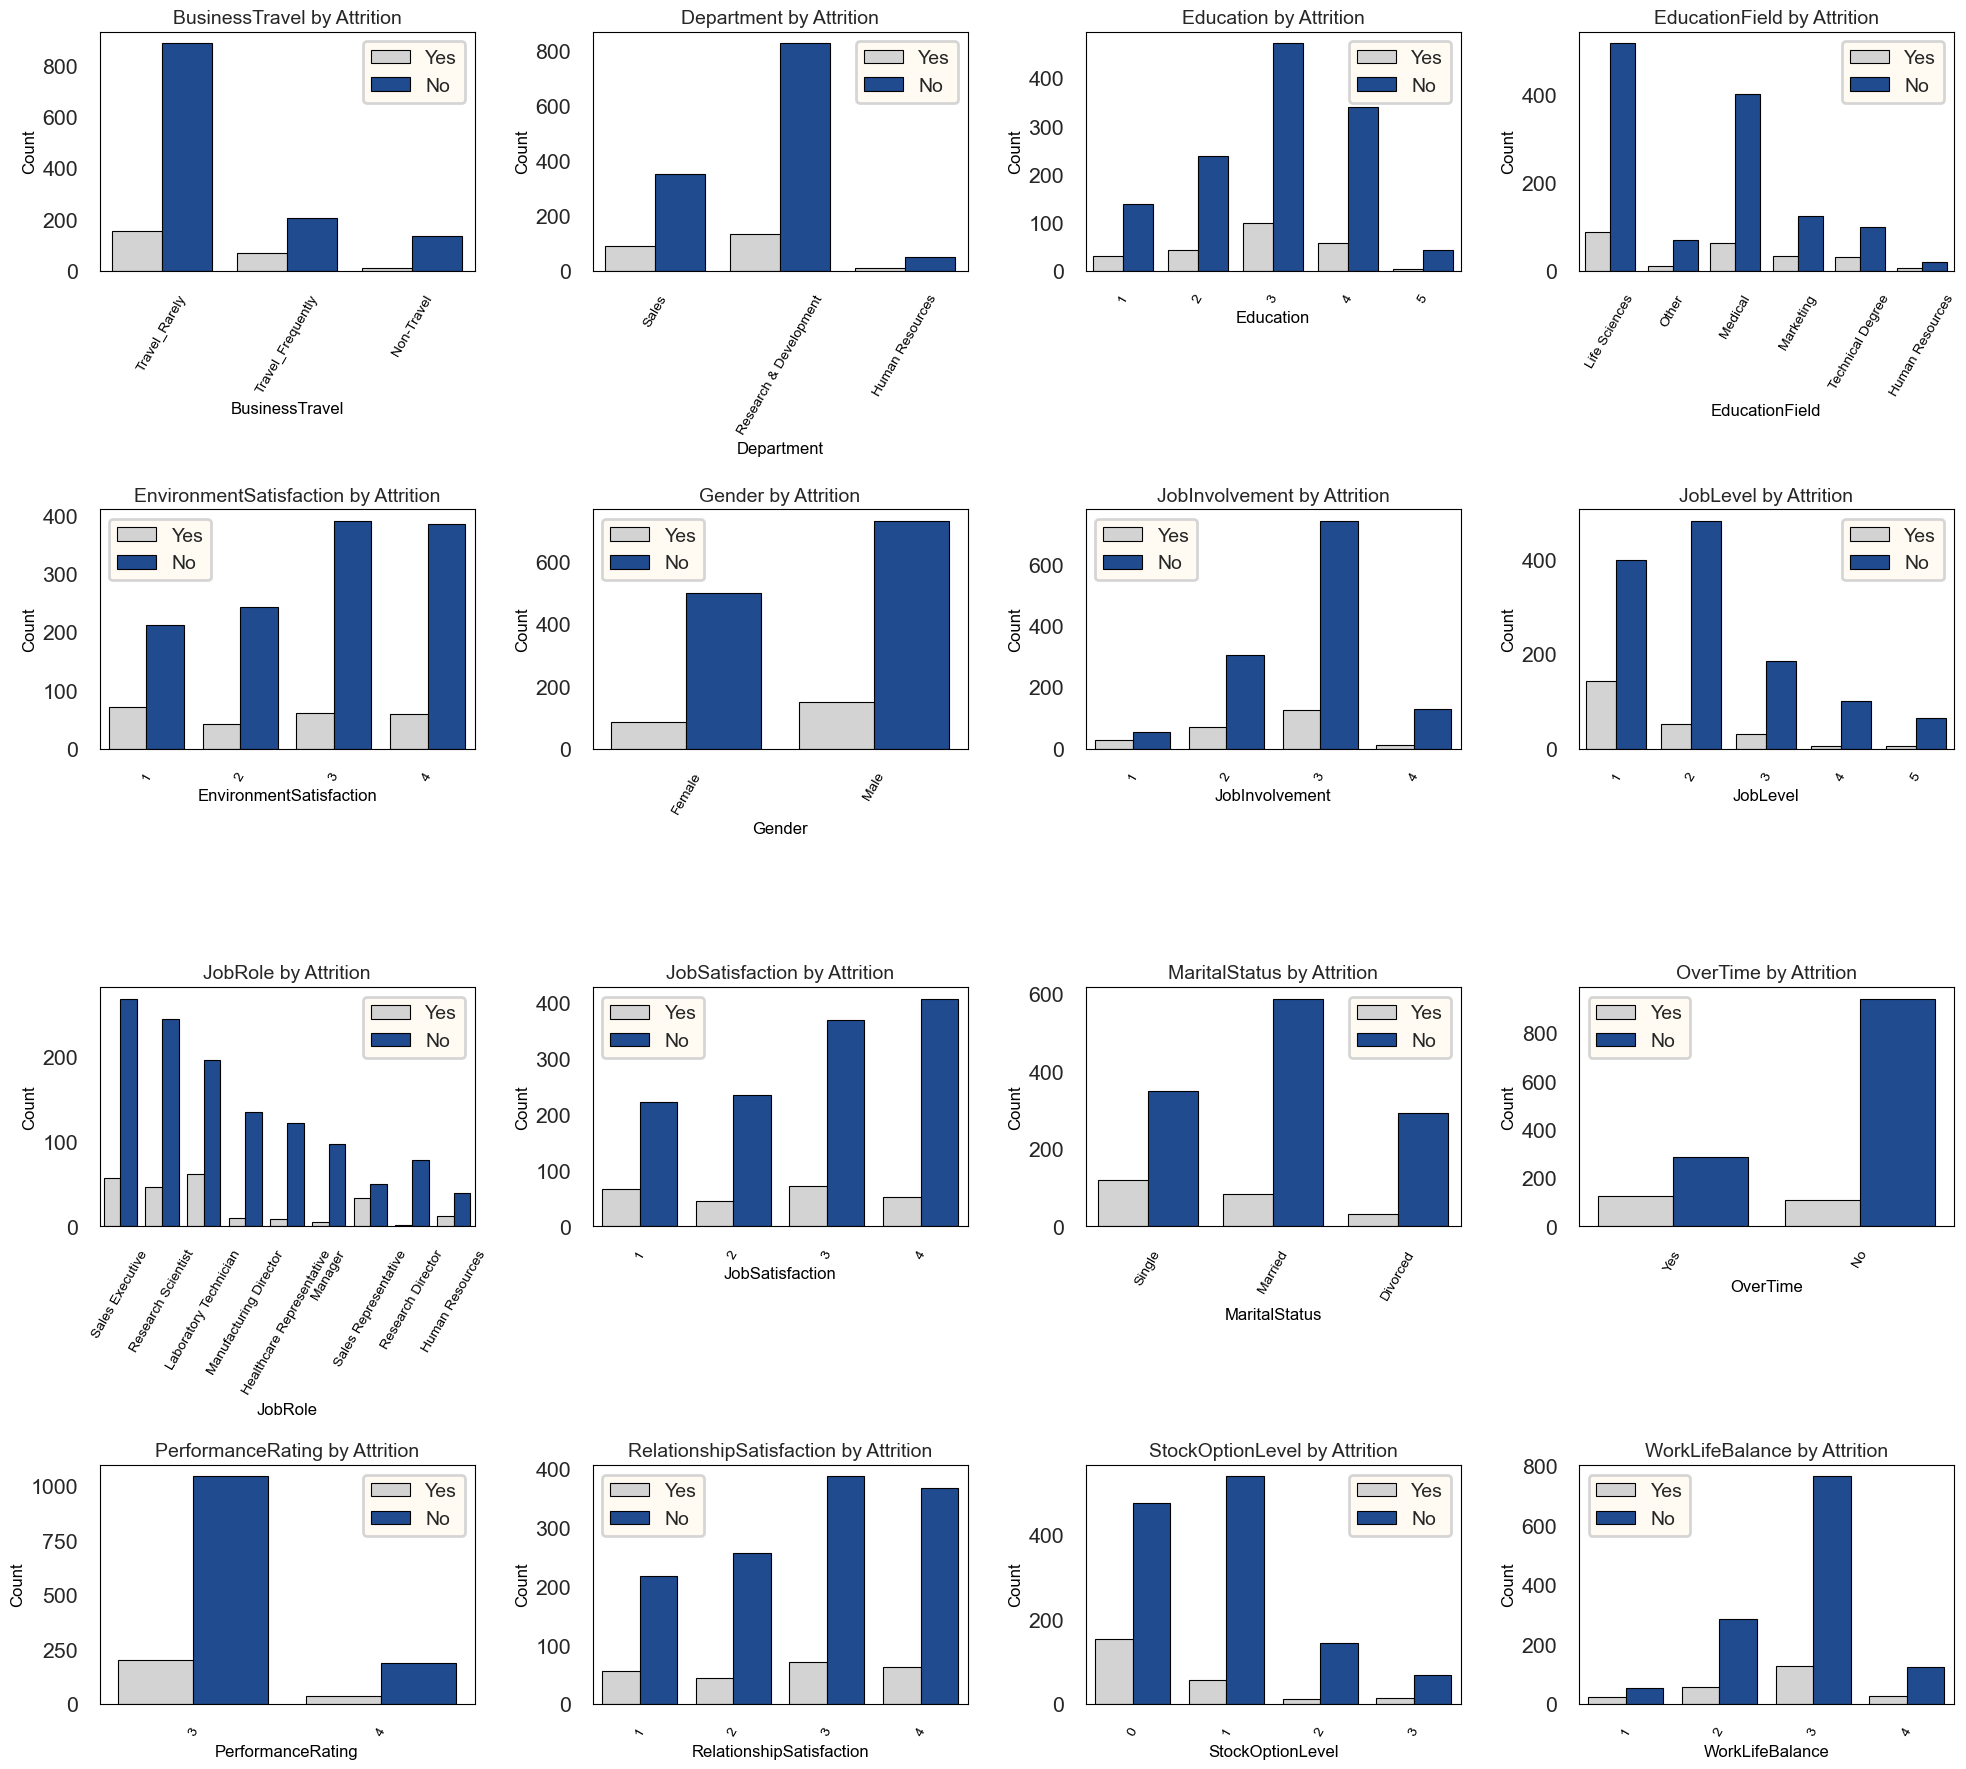

In [15]:
# Attrition vs categorical variables

# Colors for Attrition ('No' -> blue, 'Yes' -> grey)
palette = {"No": "#0d47a1", "Yes": "#D3D3D3"}

# Specify the categorical columns to include
categorical_columns = [
    'BusinessTravel', 'Department', 'Education', 'EducationField', 
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
    'WorkLifeBalance'
]

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))  # Adjust the grid size (4 rows, 4 columns)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Set the entire background color of the figure to white
fig.patch.set_facecolor('white')

# Loop through each categorical column and plot bar plots
for i, col in enumerate(categorical_columns):
    if col in df.columns:  
        # Create a count plot to show the distribution of each category by attrition
        barplot = sns.countplot(x=col, hue='Attrition', data=df, ax=axes[i], palette=palette)

        # Set the background of each subplot to white
        axes[i].set_facecolor('white')

        # Set titles and labels
        axes[i].set_title(f'{col} by Attrition', fontsize=14) 
        axes[i].set_xlabel(col, fontsize=12, color="black")
        axes[i].set_ylabel('Count', fontsize=12, color="black")

        # Rotate x-axis labels
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=60, fontsize=10, color="black")

        # Remove gridlines
        axes[i].grid(False)

        # Set axis line colors 
        for spine in ['top', 'right', 'left', 'bottom']:
            axes[i].spines[spine].set_color('black')
            axes[i].spines[spine].set_linewidth(0.8)  

        # Adjust bar colors and edge lines
        for patch in barplot.patches:
            patch.set_edgecolor('black')  
            patch.set_linewidth(0.8)  
        
        # Reduce legend font size
        if axes[i].get_legend() is not None:
            axes[i].legend(fontsize='small')

# Remove any empty plots if there are fewer plots than grid spaces
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

#### Encoding

In [16]:
# List the categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [17]:
# Use label encoder to convert attrition, gender and overtime
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])
df["Gender"] = le.fit_transform(df['Gender'])
df["OverTime"] = le.fit_transform(df['OverTime'])

In [18]:
# Use one hot encoder to convert the rest of the categorical variables
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',                                  
 'JobRole',
 'MaritalStatus']])

In [19]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())
df = pd.concat([df,encoded_df],axis=1)

In [20]:
# Drop the original variables
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',                                  
 'JobRole',
 'MaritalStatus'],axis =1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int32  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int32  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

In [22]:
print(df.head())

   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                4           5993        19479                   8         1   
1               

In [23]:
df.shape

(1470, 50)

#### Feature scaling

In [24]:
# Columns to scale (all numeric columns except for 'Attrition')
columns_to_scale = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
    'Department_Human Resources', 'Department_Research & Development', 'Department_Sales',
    'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing',
    'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree',
    'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician',
    'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director',
    'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single'
]

# Step 1: Standardization
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply standardization to the specified columns
df[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

# Step 2: Normalization
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply normalization to the already standardized columns
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

print(df.head())

        Age  Attrition  DailyRate  DistanceFromHome  Education  \
0  0.547619          1   0.715820          0.000000       0.25   
1  0.738095          0   0.126700          0.250000       0.00   
2  0.452381          1   0.909807          0.035714       0.25   
3  0.357143          0   0.923407          0.071429       0.75   
4  0.214286          0   0.350036          0.035714       0.00   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                 0.333333     0.0    0.914286        0.666667      0.25   
1                 0.666667     1.0    0.442857        0.333333      0.25   
2                 1.000000     1.0    0.885714        0.333333      0.00   
3                 1.000000     0.0    0.371429        0.666667      0.00   
4                 0.000000     1.0    0.142857        0.666667      0.00   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0         1.000000       0.262454     0.698053            0.888889

#### Correlation

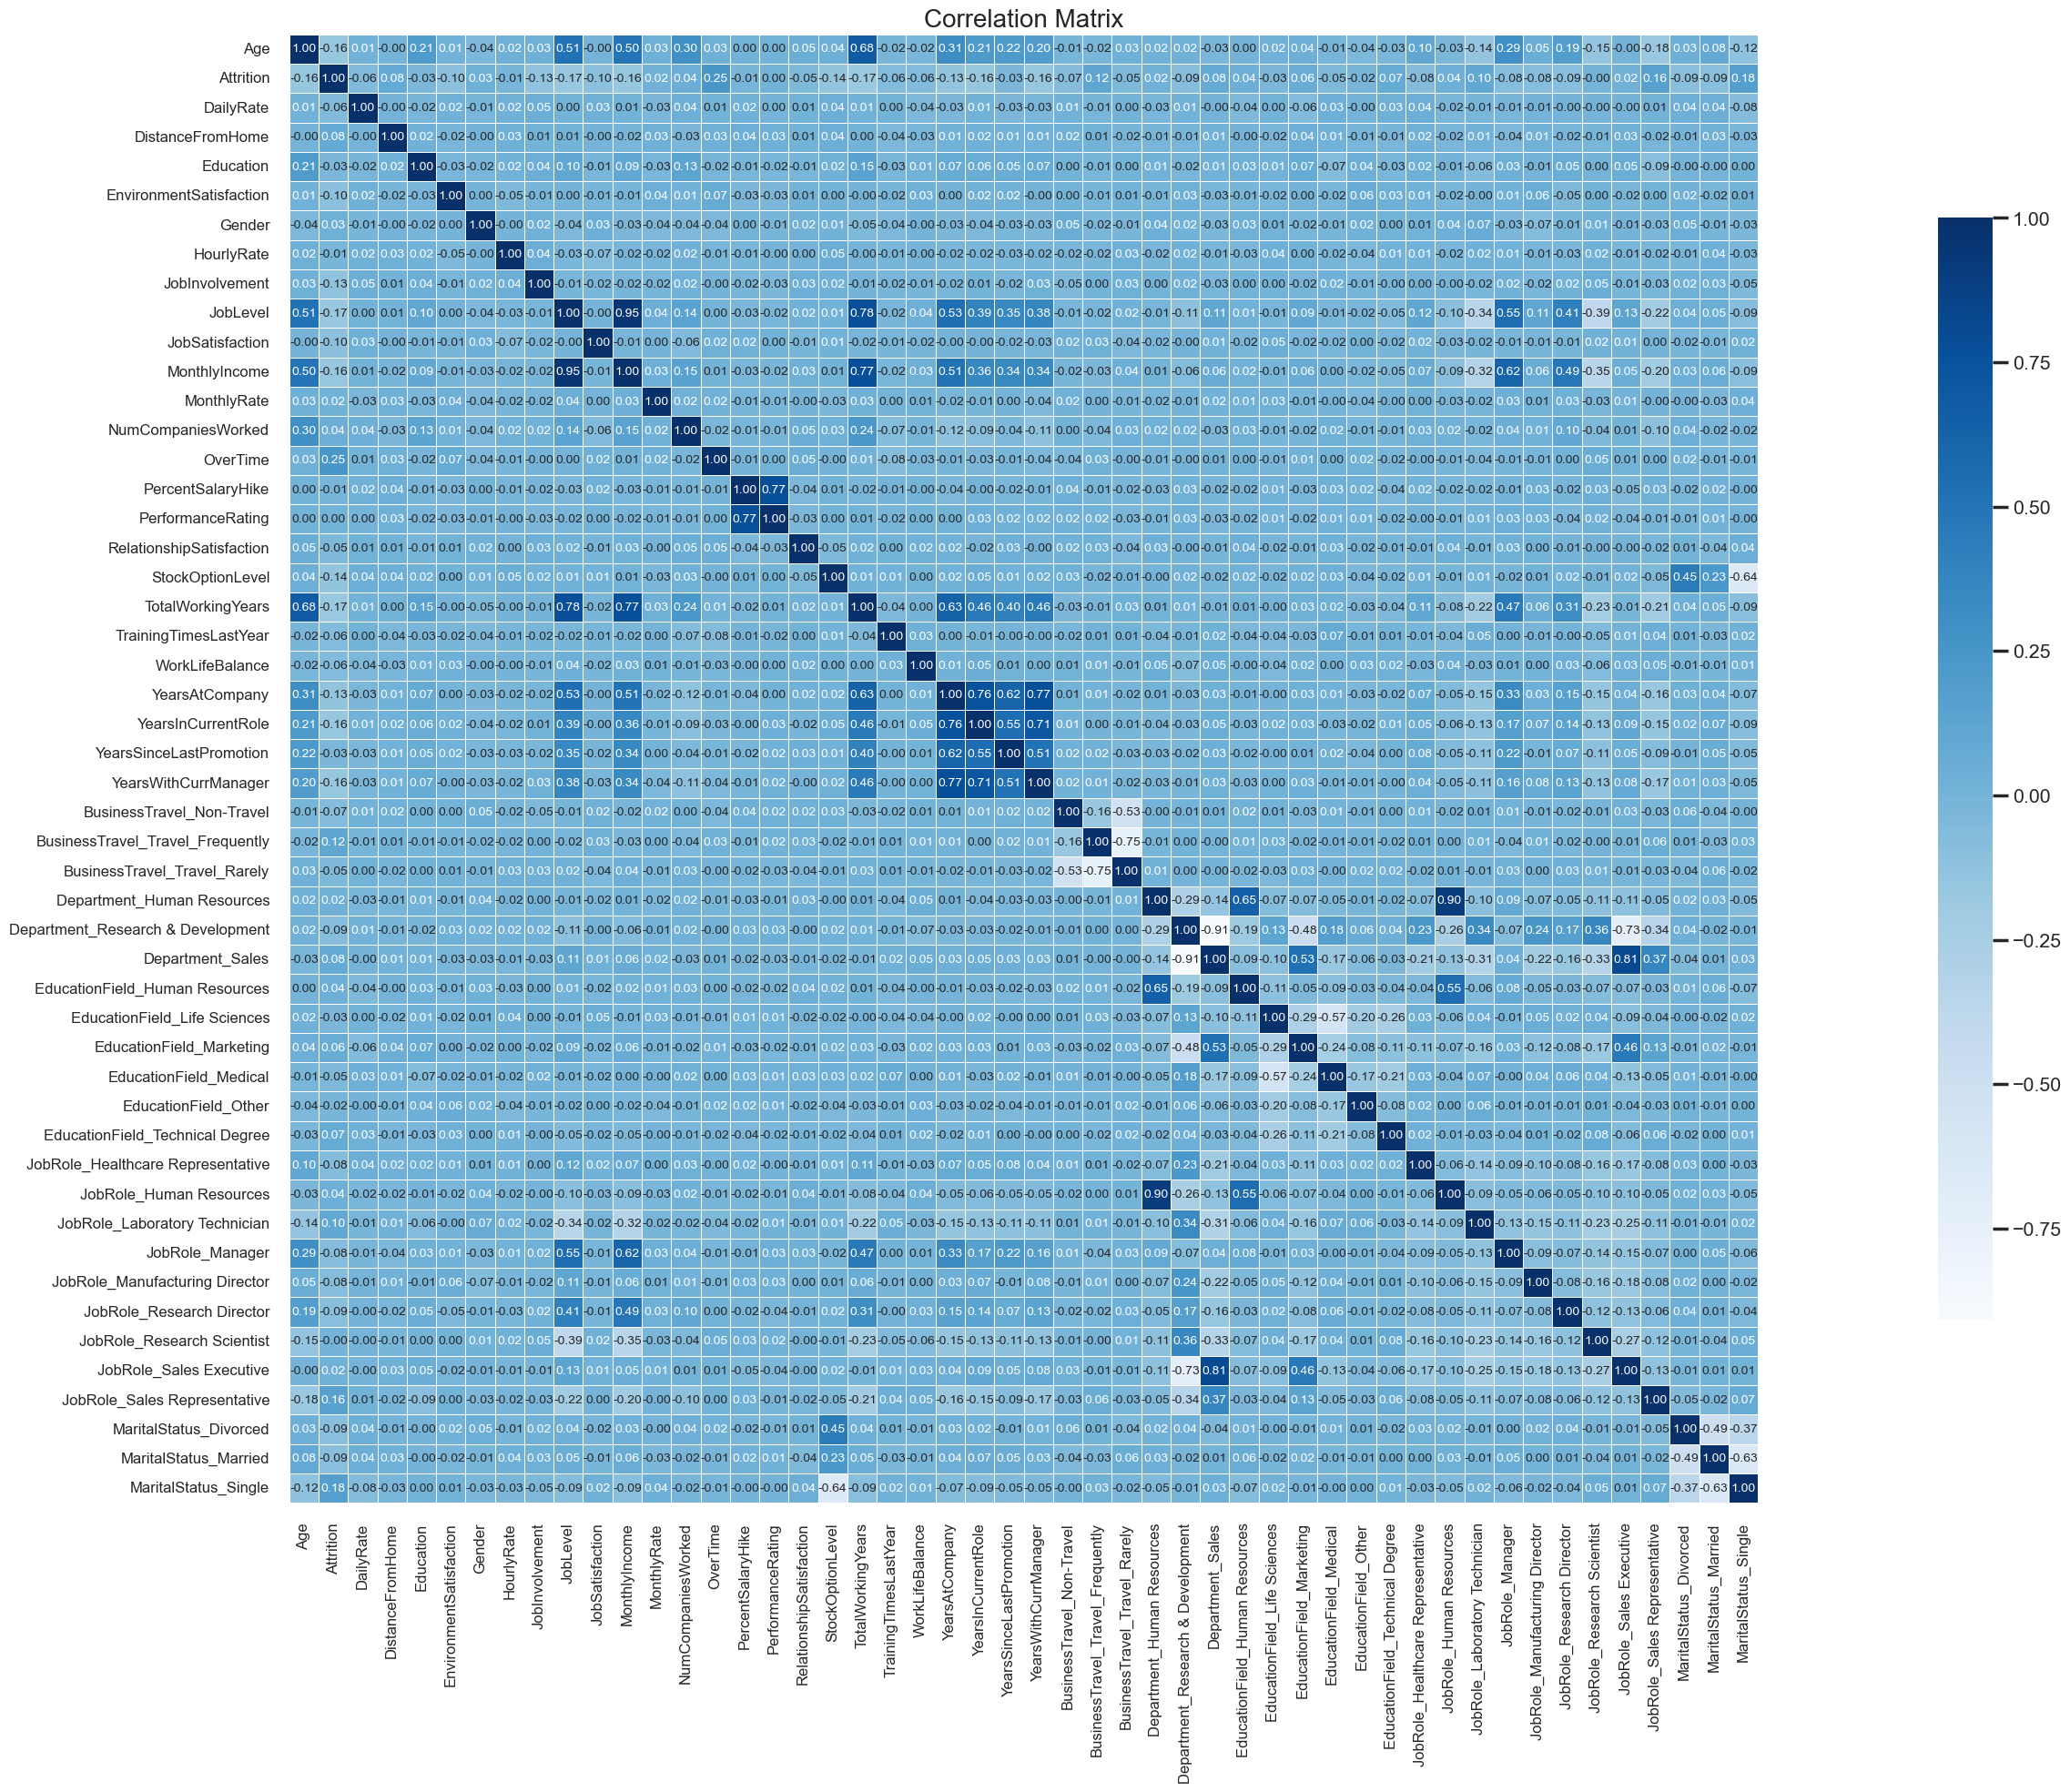

In [25]:
# Compute the full correlation matrix
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(40, 20))

# Plot the heatmap
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f',  # Format for annotations (one decimal place)
    cmap='Blues',  # Color map using shades of blue
    linewidths=0.5,  # Thinner grid lines
    annot_kws={'size': 10},  # Font size for annotations
    square=True,
    cbar_kws={"shrink": .75}  # Shrink color bar for better fit
)

# Set background color of the figure to white
plt.gcf().patch.set_facecolor('white')

# Set background color of the heatmap axes to white
heatmap.set_facecolor('white')

# Set title and adjust plot layout
plt.title("Correlation Matrix", fontsize=20) 
plt.xticks(fontsize=12, rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12) 

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

#### Feature elimination

In [26]:
# Define a threshold for high correlation
threshold = 0.7

# Find pairs of features with high correlation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_matrix.iloc[i, j]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Print the high correlation pairs
print("Highly correlated feature pairs:")
print(high_corr_df)

Highly correlated feature pairs:
                       Feature 1                          Feature 2  \
0                  MonthlyIncome                           JobLevel   
1              PerformanceRating                  PercentSalaryHike   
2              TotalWorkingYears                           JobLevel   
3              TotalWorkingYears                      MonthlyIncome   
4             YearsInCurrentRole                     YearsAtCompany   
5           YearsWithCurrManager                     YearsAtCompany   
6           YearsWithCurrManager                 YearsInCurrentRole   
7   BusinessTravel_Travel_Rarely   BusinessTravel_Travel_Frequently   
8               Department_Sales  Department_Research & Development   
9        JobRole_Human Resources         Department_Human Resources   
10       JobRole_Sales Executive  Department_Research & Development   
11       JobRole_Sales Executive                   Department_Sales   

    Correlation  
0      0.950300  
1      

In [27]:
# Drop highly correlated features

# List of features to drop
features_to_drop = [
    'JobLevel',
    'Department_Sales',
    'Department_Human Resources',
    'JobRole_Sales Executive',
    'PerformanceRating',
    'MonthlyIncome',
    'YearsAtCompany',
    'YearsWithCurrManager',
    'BusinessTravel_Travel_Rarely',
]

# Drop the features from the dataset
df = df.drop(columns=features_to_drop)

# Print the shape of the new dataframe 
print(f"New dataframe shape: {df.shape}")

New dataframe shape: (1470, 41)


#### Feature selection

In [28]:
# Recompute the correlation matrix after dropping features
corr_matrix = df.corr()

# Get the correlation values with 'Attrition'
attrition_corr = corr_matrix['Attrition'].abs().sort_values(ascending=False)

# Exclude 'Attrition' itself from the list
all_attrition_corr = attrition_corr.drop('Attrition')

# Print all correlations with 'Attrition'
print("All correlations with 'Attrition':")
print(all_attrition_corr)

All correlations with 'Attrition':
OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
YearsInCurrentRole                   0.160545
Age                                  0.159205
JobRole_Sales Representative         0.157234
StockOptionLevel                     0.137145
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
JobRole_Manager                      0.083316
JobRole_Manufacturing Director       0.082994
JobRole_Healthcare Representative    0.078696
DistanceFromHome                     0.077924
BusinessTravel_Non-Travel            0.074457

In [29]:
# Get all feature names that are correlated with 'Attrition'
all_features = all_attrition_corr.index.tolist()

# Create a new DataFrame with only these features plus the target variable 'Attrition'
df_all_features = df[all_features + ['Attrition']]

#### Split data into independent and dependent variable

In [30]:
# Separate features and target variable
X_all = df_all_features.drop(columns='Attrition')
y_all = df_all_features['Attrition']

#### Split data into training and test sets

In [31]:
# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print("Training set size:", X_train_all.shape[0], "samples")
print("Testing set size:", X_test_all.shape[0], "samples")

Training set size: 1176 samples
Testing set size: 294 samples


#### Handle imbalanced data

In [32]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and resample
X_train_all_resampled, y_train_all_resampled = smote.fit_resample(X_train_all, y_train_all)

# Print the original and resampled class distribution
print("Original training set class distribution:", Counter(y_train_all))
print("Resampled training set class distribution:", Counter(y_train_all_resampled))

Original training set class distribution: Counter({0: 978, 1: 198})
Resampled training set class distribution: Counter({0: 978, 1: 978})


#### Model building

In [33]:
# Define the models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [34]:
# Define hyperparameters for each model
param_grids = {
    # Naive Bayes 
    'Naive Bayes': {    
    },
    
    # Logistic Regression
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],  # Regularization strength
        'solver': ['lbfgs', 'liblinear'],  # Solver algorithms
        'penalty': ['l1', 'l2'],  # Type of regularization
        'max_iter': [200, 500]  # Maximum number of iterations for solver to converge
    },
    
    # K-Nearest Neighbors
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider for classification
        'weights': ['uniform', 'distance'],  # How to weight the neighbors
        'metric': ['euclidean', 'manhattan'],  # Distance metric
    },
        
    # Support Vector Machine
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['rbf', 'poly'],  # Kernel type
        'gamma': ['scale', 'auto'],  # Kernel coefficient
        'degree': [2, 3]  # Degree of polynomial kernel (only for poly kernel)
    },
    
    # Decision Tree
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],  # Quality of split 
        'max_depth': [10, 15, 20, 25],  # Maximum depth of the tree to control overfitting
        'min_samples_split': [5, 10, 20],  # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node to control tree growth
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'ccp_alpha': [0.0, 0.01, 0.05]  # Complexity parameter for pruning the tree
    },
    
    # Random Forest
    'Random Forest': {
        'n_estimators': [100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of each tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
        'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
        'bootstrap': [True]  # Use bootstrapped samples when building trees
    },
    
    # XGBoost
    'XGBoost': {
        'n_estimators': [100, 200, 300],  # Number of trees built
        'max_depth': [3, 5, 7],  # Maximum depth of tree to control overfitting
        'learning_rate': [0.01, 0.1, 0.2],  # Reduce the contribution of tree to prevent overfitting
        'subsample': [0.7, 0.8, 0.9],  # Samples used per tree to reduce overfitting
        'colsample_bytree': [0.7, 0.8, 0.9],  # Features used per tree to prevent overfitting
        'gamma': [0, 0.1, 0.2],  # Minimum loss reduction needed for a split to be made
        'min_child_weight': [1, 3]  # Minimum sum of instance weights needed in a child node
    }
}

In [35]:
# Dictionary to store the best models after hyperparameter tuning
best_models = {}

# Perform Grid Search for each model
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    
    # Get the hyperparameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Initialize GridSearchCV
    search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Fit the model with cross-validation
    search.fit(X_train_all_resampled, y_train_all_resampled)
    
    # Store the best model
    best_models[model_name] = search.best_estimator_
    
    # Print the results
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {search.best_score_}\n")

Optimizing Naive Bayes...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters for Naive Bayes: {}
Best cross-validation accuracy for Naive Bayes: 0.7039691261119834

Optimizing Logistic Regression...
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.827687074829932

Optimizing K-Nearest Neighbors...
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.9120591313448457

Optimizing Support Vector Machine...
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters for Support Vector Machine: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy for Support Vecto

#### Model evaluation

Evaluating Naive Bayes
Accuracy: 0.5340
Recall: 0.6667
Precision: 0.1733
F1 Score: 0.2751
ROC AUC Score: 0.6817
Confusion Matrix:
[[131 124]
 [ 13  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.51      0.66       255
           1       0.17      0.67      0.28        39

    accuracy                           0.53       294
   macro avg       0.54      0.59      0.47       294
weighted avg       0.81      0.53      0.61       294




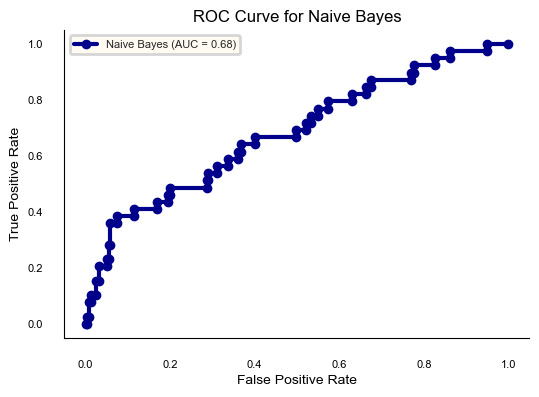

Evaluating Logistic Regression
Accuracy: 0.7517
Recall: 0.5897
Precision: 0.2875
F1 Score: 0.3866
ROC AUC Score: 0.7673
Confusion Matrix:
[[198  57]
 [ 16  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.84       255
           1       0.29      0.59      0.39        39

    accuracy                           0.75       294
   macro avg       0.61      0.68      0.62       294
weighted avg       0.84      0.75      0.78       294




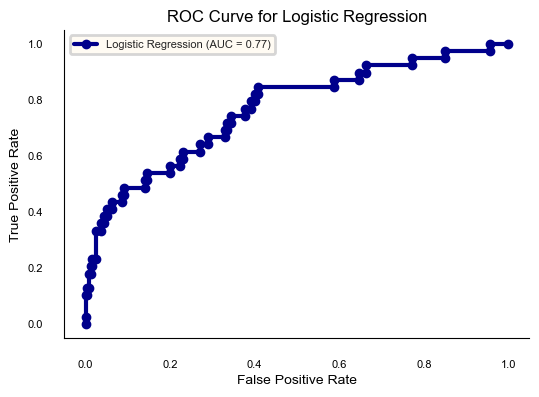

Evaluating K-Nearest Neighbors
Accuracy: 0.7755
Recall: 0.4615
Precision: 0.2857
F1 Score: 0.3529
ROC AUC Score: 0.6226
Confusion Matrix:
[[210  45]
 [ 21  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       255
           1       0.29      0.46      0.35        39

    accuracy                           0.78       294
   macro avg       0.60      0.64      0.61       294
weighted avg       0.83      0.78      0.80       294




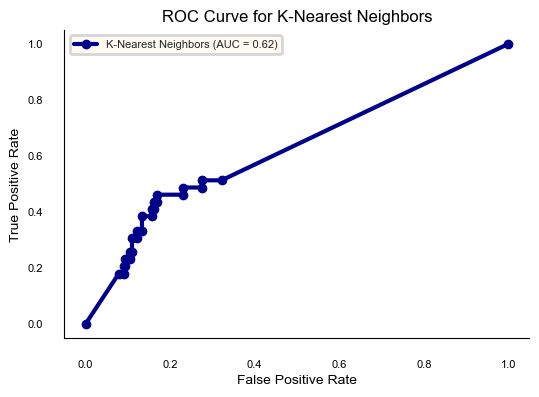

Evaluating Support Vector Machine
Accuracy: 0.8707
Recall: 0.3590
Precision: 0.5185
F1 Score: 0.4242
ROC AUC Score: 0.7248
Confusion Matrix:
[[242  13]
 [ 25  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294




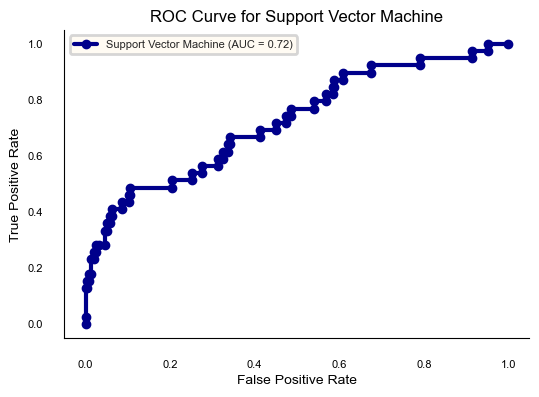

Evaluating Decision Tree
Accuracy: 0.7993
Recall: 0.4615
Precision: 0.3214
F1 Score: 0.3789
ROC AUC Score: 0.6720
Confusion Matrix:
[[217  38]
 [ 21  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       255
           1       0.32      0.46      0.38        39

    accuracy                           0.80       294
   macro avg       0.62      0.66      0.63       294
weighted avg       0.83      0.80      0.81       294




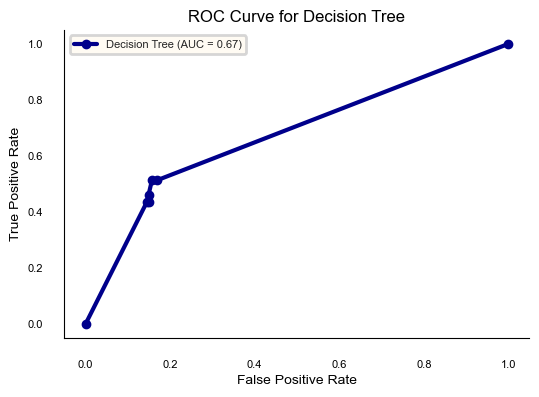

Evaluating Random Forest
Accuracy: 0.9014
Recall: 0.2821
Precision: 0.9167
F1 Score: 0.4314
ROC AUC Score: 0.7605
Confusion Matrix:
[[254   1]
 [ 28  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       255
           1       0.92      0.28      0.43        39

    accuracy                           0.90       294
   macro avg       0.91      0.64      0.69       294
weighted avg       0.90      0.90      0.88       294




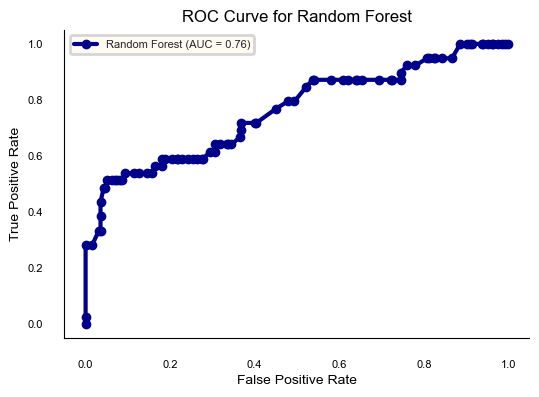

Evaluating XGBoost
Accuracy: 0.9048
Recall: 0.4359
Precision: 0.7391
F1 Score: 0.5484
ROC AUC Score: 0.7990
Confusion Matrix:
[[249   6]
 [ 22  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       255
           1       0.74      0.44      0.55        39

    accuracy                           0.90       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.89      0.90      0.89       294




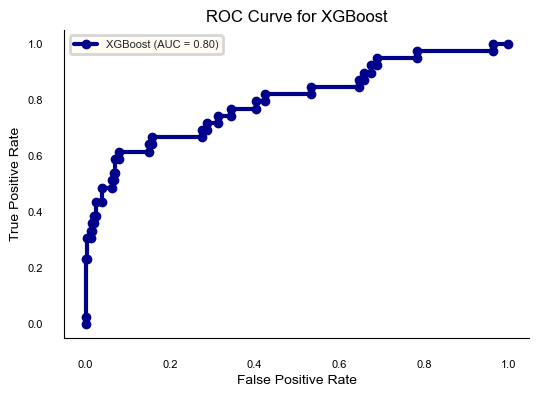

In [36]:
# Initialize the dictionary to store evaluation metrics
evaluation_metrics = {}

# Iterate over each model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}")
    
    # Predict on the test set
    y_pred = model.predict(X_test_all)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_all, y_pred)
    recall = recall_score(y_test_all, y_pred, pos_label=1)
    precision = precision_score(y_test_all, y_pred, pos_label=1) 
    f1 = f1_score(y_test_all, y_pred, pos_label=1) 
    conf_matrix = confusion_matrix(y_test_all, y_pred)
    class_report = classification_report(y_test_all, y_pred)
    roc_auc = roc_auc_score(y_test_all, model.predict_proba(X_test_all)[:, 1])

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_all, model.predict_proba(X_test_all)[:, 1], pos_label=1)

    # Store metrics
    evaluation_metrics[model_name] = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'roc_auc_score': roc_auc,
        'roc_curve': (fpr, tpr)
    }

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print()

    # Plot ROC Curve with customized aesthetics
    fig, ax = plt.subplots(figsize=(6, 4))

    # Set entire figure background to white
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')  # Set the background of the plot area to white as well

    # Plot the ROC curve 
    ax.plot(fpr, tpr, marker='.', color='darkblue', label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Customize the axis and background
    ax.spines['top'].set_color('none')    
    ax.spines['right'].set_color('none')  
    ax.spines['left'].set_color('black')  
    ax.spines['bottom'].set_color('black')  

    # Axis lines
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)

    # x and y axis ticks and labels
    ax.tick_params(axis='x', colors='black', labelsize=8)  
    ax.tick_params(axis='y', colors='black', labelsize=8) 

    # Labels and title 
    ax.set_xlabel('False Positive Rate', color='black', fontsize=10)
    ax.set_ylabel('True Positive Rate', color='black', fontsize=10)
    ax.set_title(f'ROC Curve for {model_name}', color='black', fontsize=12)

    # No grid
    ax.grid(False)

    # Legend
    ax.legend(fontsize=8)

    plt.show()

#### ROC curves for all models

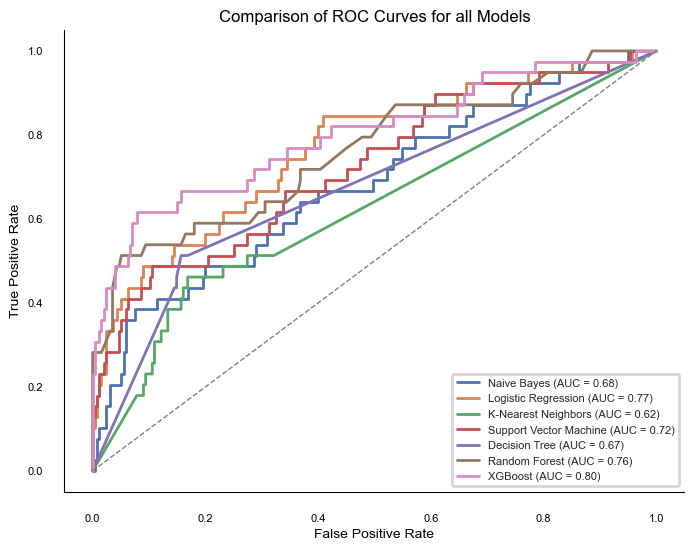

In [37]:
# Initialize the plot for ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

# Set the figure background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')  # Set the plot background to white

# Iterate over each model and plot ROC curves
for model_name, model in best_models.items():
    # Predict probabilities for ROC AUC curve
    y_pred_proba = model.predict_proba(X_test_all)[:, 1]
    
    # Calculate the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_all, y_pred_proba, pos_label=1)
    roc_auc = roc_auc_score(y_test_all, y_pred_proba)
    
    # Plot the ROC curve with customized line styles and labels
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2)

# Plot diagonal reference line for random guessing
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

# Customize the axis
ax.spines['top'].set_color('none')    
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('black') 
ax.spines['bottom'].set_color('black')  

# Thinner axis lines
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# x and y axis ticks and labels
ax.tick_params(axis='x', colors='black', labelsize=8)
ax.tick_params(axis='y', colors='black', labelsize=8)

# Labels and title 
ax.set_xlabel('False Positive Rate', color='black', fontsize=10)
ax.set_ylabel('True Positive Rate', color='black', fontsize=10)
ax.set_title('Comparison of ROC Curves for all Models', color='black', fontsize=12)

# No grid
ax.grid(False)

# Legend with white background
legend = ax.legend(loc='lower right', fontsize=8)
legend.get_frame().set_facecolor('white')  # Set legend background to white

# Show the plot
plt.show()

#### Feature Importance

Feature importances for Random Forest:
                              Feature  Importance
0                            OverTime    0.103389
6                    StockOptionLevel    0.069100
3                  YearsInCurrentRole    0.056987
2                   TotalWorkingYears    0.050360
9                     JobSatisfaction    0.049697
4                                 Age    0.046729
22                    WorkLifeBalance    0.043619
7                      JobInvolvement    0.041224
28                 NumCompaniesWorked    0.036639
10            EnvironmentSatisfaction    0.034419
38                         HourlyRate    0.034293
24                          DailyRate    0.034032
19                   DistanceFromHome    0.032148
33                          Education    0.030765
36                        MonthlyRate    0.030528
27           RelationshipSatisfaction    0.030225
23              TrainingTimesLastYear    0.028281
31            YearsSinceLastPromotion    0.026816
37         

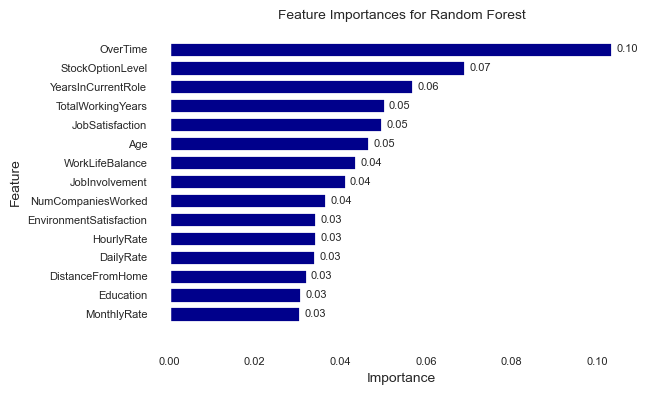

In [49]:
# Get the Random Forest model from the best models
rf_model = best_models['Random Forest']

# Get feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_importance_df = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances for Random Forest
print("Feature importances for Random Forest:")
print(rf_importance_df)

# Plot all feature importances 
plt.figure(figsize=(6, 4))

# Set plot background to white
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white')  

# Plot horizontal bar chart
bars = plt.barh(rf_importance_df.head(15)['Feature'], rf_importance_df.head(15)['Importance'], color='darkblue')

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Add labels on the bars
for bar in bars:
    plt.text(bar.get_width()+ 0.001, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', va='center', fontsize=8)
    
# Customize axis labels
plt.xlabel('Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Customize x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Remove gridlines
plt.grid(False)

# Set title
plt.title('Feature Importances for Random Forest', fontsize=10)

# Display the plot
plt.show()

Feature importances for XGBoost:
                              Feature  Importance
0                            OverTime    0.124676
6                    StockOptionLevel    0.077548
18  JobRole_Healthcare Representative    0.055781
17     JobRole_Manufacturing Director    0.051613
22                    WorkLifeBalance    0.042830
13          JobRole_Research Director    0.041841
8    BusinessTravel_Travel_Frequently    0.037209
30            JobRole_Human Resources    0.036466
5        JobRole_Sales Representative    0.031517
7                      JobInvolvement    0.030250
20          BusinessTravel_Non-Travel    0.029773
11      JobRole_Laboratory Technician    0.028301
35               EducationField_Other    0.027480
9                     JobSatisfaction    0.025527
3                  YearsInCurrentRole    0.023277
1                MaritalStatus_Single    0.021389
10            EnvironmentSatisfaction    0.020663
2                   TotalWorkingYears    0.020422
21    EducationFi

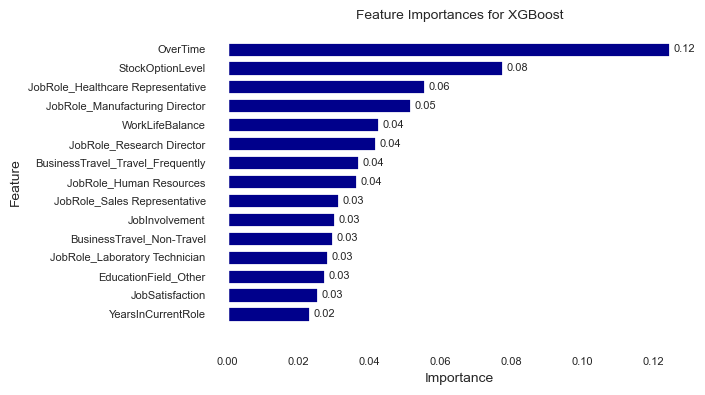

In [50]:
# Get the XGBoost model from the best models
xgb_model = best_models['XGBoost']

# Get feature importances
xgb_feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
xgb_importance_df = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances for XGBoost
print("Feature importances for XGBoost:")
print(xgb_importance_df)

# Plot all feature importances 
plt.figure(figsize=(6, 4))

# Set plot background to white
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white') 

# Plot horizontal bar chart
bars = plt.barh(xgb_importance_df.head(15)['Feature'], xgb_importance_df.head(15)['Importance'], color='darkblue')

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Add labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,  # Added distance of 0.02
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Customize axis labels
plt.xlabel('Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Customize x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Remove gridlines
plt.grid(False)

# Set title
plt.title('Feature Importances for XGBoost', fontsize=10)

# Display the plot
plt.show()